# Clustering model

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from  sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Data gathering

In [2]:
data=pd.read_csv(r"D:\machine learning\project\Effects of Social Media on Mental Health\The Effects of Social Media on Mental Health.csv")
data

,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,5,5,3,2,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,6,4,3,2,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,5,2,2,1,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,6,3,2,1,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,5,4,5,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,24.0,Male,Single,Salaried Worker,University,Yes,"Facebook, Instagram, YouTube",3,5,4,4,3,3,4,4,2,4,3,4,4
475,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",2,1,3,1,2,4,4,4,2,4,4,4,1
476,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",2,5,3,3,4,2,3,3,3,4,2,2,2
477,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,5,3,3,2,3,2,2,3,4,4,5,4


# EDA(Explorative Data Analysis)

In [3]:
data.shape #No.of rows and columns

(479, 20)

In [4]:
# get information
data.info() #checking Data type and size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           479 non-null    float64
 1   Gender                        479 non-null    object 
 2   RelationshipStatus            479 non-null    object 
 3   Occupation                    479 non-null    object 
 4   Organization                  479 non-null    object 
 5   SocialMedia                   479 non-null    object 
 6   SocialMediaPlatforms          479 non-null    object 
 7   NumberofSocialMediaPlatforms  479 non-null    int64  
 8   HoursSpent                    479 non-null    int64  
 9   Frequency                     479 non-null    int64  
 10  Distraction                   479 non-null    int64  
 11  Restlessness                  479 non-null    int64  
 12  Anxiety                       479 non-null    int64  
 13  Conce

In [5]:
# statistical information
data.describe()

,Age,NumberofSocialMediaPlatforms,HoursSpent,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,26.164301,4.263048,4.371608,3.344468,3.315240,2.582463,3.567850,3.244259,2.830898,2.774530,2.457203,3.260960,3.173278,3.202505
std,9.925197,1.972009,1.823747,1.175199,1.328319,1.254692,1.278683,1.349432,1.410735,1.056608,1.249998,1.311663,1.258127,1.458891
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.000000,5.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.000000,4.000000,5.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,6.000000,5.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.000000,9.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
data.isnull().sum() #finding null values

Age                             0
Gender                          0
RelationshipStatus              0
Occupation                      0
Organization                    0
SocialMedia                     0
SocialMediaPlatforms            0
NumberofSocialMediaPlatforms    0
HoursSpent                      0
Frequency                       0
Distraction                     0
Restlessness                    0
Anxiety                         0
ConcentrationDifficulty         0
SelfComparision                 0
PostSentiment                   0
ValidationSeeking               0
Depression                      0
ActivityInterest Variance       0
Sleeplessness                   0
dtype: int64

# Feature Engineering

In [7]:
# Select relevant columns for clustering
X = data.drop(['Age ', 'Gender', 'RelationshipStatus', 'Occupation ', 'Organization', 'SocialMedia', 'SocialMediaPlatforms'], axis=1)


In [8]:
# Encode categorical variables
encoder = LabelEncoder()
data['SocialMedia'] = encoder.fit_transform(data['SocialMedia'])
data

,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
0,21.0,Male,In a relationship,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",6,5,5,3,2,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",6,6,4,3,2,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube, Pinterest",4,5,2,2,1,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,1,"Facebook, Instagram",2,6,3,2,1,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube",3,5,4,5,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,24.0,Male,Single,Salaried Worker,University,1,"Facebook, Instagram, YouTube",3,5,4,4,3,3,4,4,2,4,3,4,4
475,26.0,Female,Married,Salaried Worker,University,1,"Facebook, YouTube",2,1,3,1,2,4,4,4,2,4,4,4,1
476,29.0,Female,Married,Salaried Worker,University,1,"Facebook, YouTube",2,5,3,3,4,2,3,3,3,4,2,2,2
477,21.0,Male,Single,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",6,5,3,3,2,3,2,2,3,4,4,5,4


In [9]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


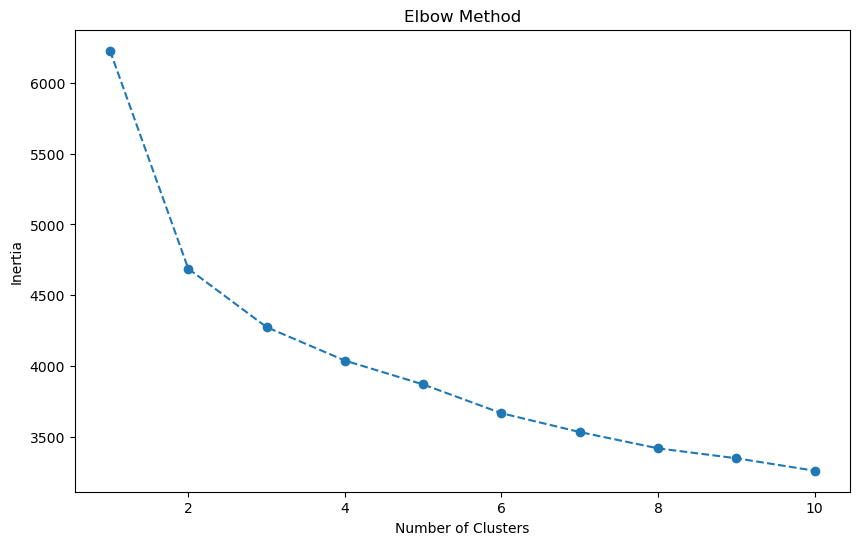

In [10]:
# Determine optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [11]:
# Based on the Elbow method, select the optimal number of clusters
k = 3  # You can change this to the appropriate number based on the elbow plot

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [12]:
# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_



In [13]:
data

,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,...,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness,Cluster
0,21.0,Male,In a relationship,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",6,5,5,...,2,2,5,2,3,2,5,4,5,1
1,21.0,Female,Single,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",6,6,4,...,2,5,4,5,1,1,5,4,5,1
2,21.0,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube, Pinterest",4,5,2,...,1,5,4,3,3,1,4,2,5,0
3,21.0,Female,Single,University Student,University,1,"Facebook, Instagram",2,6,3,...,1,5,3,5,1,2,4,3,2,0
4,21.0,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube",3,5,4,...,4,5,5,3,3,3,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,24.0,Male,Single,Salaried Worker,University,1,"Facebook, Instagram, YouTube",3,5,4,...,3,3,4,4,2,4,3,4,4,1
475,26.0,Female,Married,Salaried Worker,University,1,"Facebook, YouTube",2,1,3,...,2,4,4,4,2,4,4,4,1,0
476,29.0,Female,Married,Salaried Worker,University,1,"Facebook, YouTube",2,5,3,...,4,2,3,3,3,4,2,2,2,0
477,21.0,Male,Single,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",6,5,3,...,2,3,2,2,3,4,4,5,4,0


In [14]:
# Select two features
def Scatter(feature1,feature2):

    # Scatter plot of two features colored by cluster labels
    plt.figure(figsize=(10, 6))
    plt.scatter(data[feature1], data[feature2], c=data['Cluster'], cmap='viridis', edgecolor='k', s=100)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Scatter Plot by K-means Clusters')
    plt.colorbar(label='Cluster')
    plt.show()


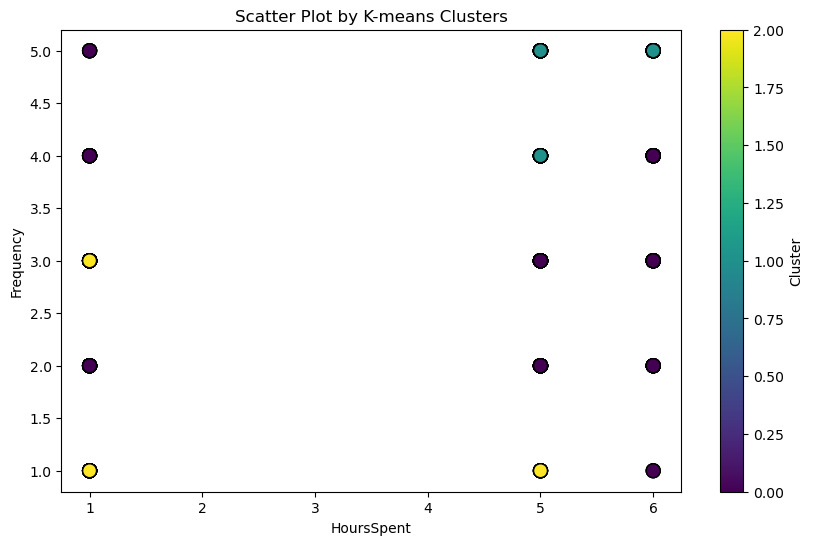

In [15]:
Scatter("HoursSpent","Frequency")

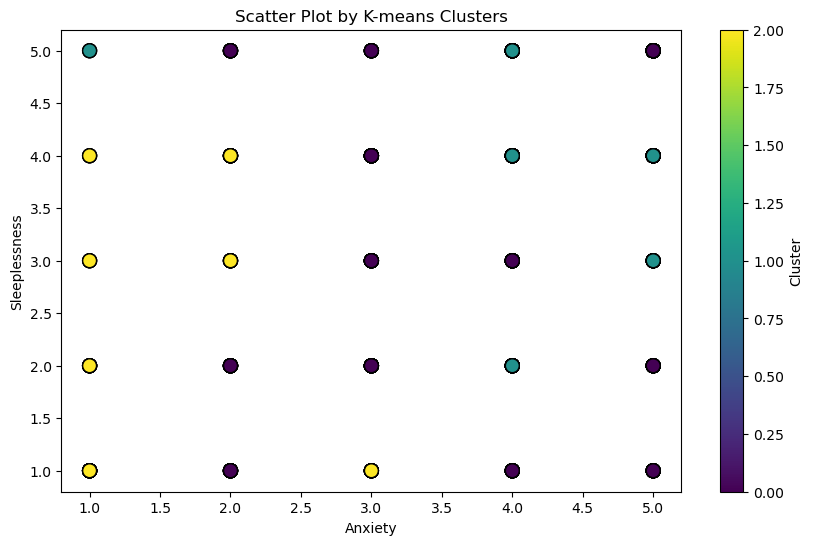

In [16]:
Scatter("Anxiety","Sleeplessness")

In [17]:
# Print cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print(centers_df)

   NumberofSocialMediaPlatforms  HoursSpent  Frequency  Distraction  \
0                      4.207921    4.188119   3.079208     3.019802   
1                      4.770000    5.255000   4.175000     4.230000   
2                      3.090909    2.558442   1.883117     1.714286   

   Restlessness   Anxiety  ConcentrationDifficulty  SelfComparision  \
0      2.287129  3.450495                 2.950495         2.396040   
1      3.395000  4.340000                 4.220000         3.670000   
2      1.246753  1.870130                 1.480519         1.792208   

   PostSentiment  ValidationSeeking  Depression  ActivityInterest Variance  \
0       2.950495           2.242574    2.990099                   2.792079   
1       2.735000           2.970000    4.120000                   4.050000   
2       2.415584           1.688312    1.740260                   1.896104   

   Sleeplessness  
0       3.014851  
1       3.840000  
2       2.038961  
